# iJava

#### Functional programming

In [9]:
// source: https://dzone.com/articles/how-to-use-map-filter-collect-of-stream-in-java-8

import java.util.Arrays;
import java.util.List;
import java.util.stream.Collectors;

List<String> numbers = Arrays.asList("1", "2", "3", "4", "5", "6");
System.out.println("original list: " + numbers);

List<Integer> even = numbers.stream()
                            .map(s -> Integer.valueOf(s))
                            .filter(number -> number % 2 == 0)
                            .collect(Collectors.toList());
System.out.println("processed list, only even numbers: " + even);

original list: [1, 2, 3, 4, 5, 6]
processed list, only even numbers: [2, 4, 6]


#### Declare a static method without a class

In [10]:
import java.util.HashMap;

// public static int fibonanchi(int n) {
//     if(n <= 1) { return n; }
//     else       { return fibonanchi(n-1) + fibonanchi(n-2); }
// }

public static int fibonanchi(int n, HashMap cache) {
    // int value = (Integer)cache.get(n);
    if( ! cache.containsKey(n) ) {
        int value;
        if(n <= 1) { value = n; }
        else       { value = fibonanchi(n-1, cache) + fibonanchi(n-2, cache); }    
        cache.put(n, value);
    }
    return (int)cache.get(n);
}

// Need to reload juypter kernel to recompile functions
// Must be declated after fibonanchi(int, HashMap)  
public static int fibonanchi(int n) {
    return fibonanchi(n, new HashMap());
}

In [11]:
fibonanchi(10)

55

In [12]:
import static java.util.stream.Collectors.toList;
import java.util.stream.IntStream;
IntStream.rangeClosed(0, 0+10).boxed().map(n -> fibonanchi(n)).collect(toList());

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

#### Draw a plot

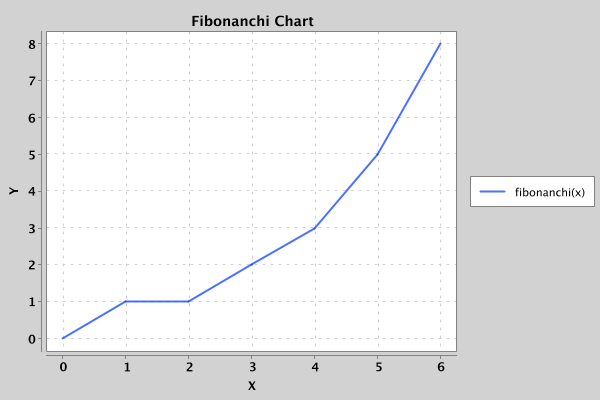

In [13]:
// Source: https://github.com/SpencerPark/ijava-binder/blob/master/3rdPartyDependency.ipynb

// %maven com.jcabi:jcabi-aspects:xchart:0.22.6  // Could not find artifact com.jcabi:jcabi-aspects:xchart:0.22.6 in central (https://repo1.maven.org/maven2)
// import com.jcabi.aspects.Cacheable;

%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;
import java.util.stream.IntStream;
import java.util.stream.Collectors;

List<Integer> xData = IntStream.rangeClosed(0, 0+6).boxed().collect(Collectors.toList());
List<Integer> yData = xData.stream().map(n -> fibonanchi(n)).collect(Collectors.toList());

XYChart chart = QuickChart.getChart("Fibonanchi Chart", "X", "Y", "fibonanchi(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);

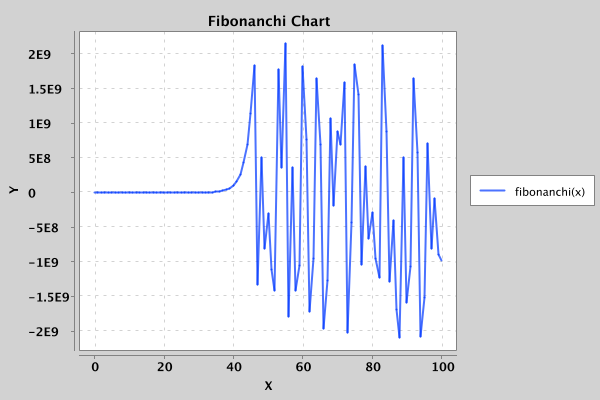

In [14]:
List<Integer> xData = IntStream.rangeClosed(0, 0+100).boxed().collect(Collectors.toList());
List<Integer> yData = xData.stream().map(n -> fibonanchi(n)).collect(Collectors.toList());

XYChart chart = QuickChart.getChart("Fibonanchi Chart", "X", "Y", "fibonanchi(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);